In [1]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
# Bringing in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for Viz things
from matplotlib import pyplot as plt

In [3]:
# using the tensorflow dataset api to load in the data source  
ds=tfds.load("fashion_mnist",split="train")

In [4]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [5]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [6]:
# doing some data transformation
import numpy as np

In [ ]:
# setting up data iterator
data_iterator=ds.as_numpy_iterator()

In [ ]:
# getting data from the input pipeline
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

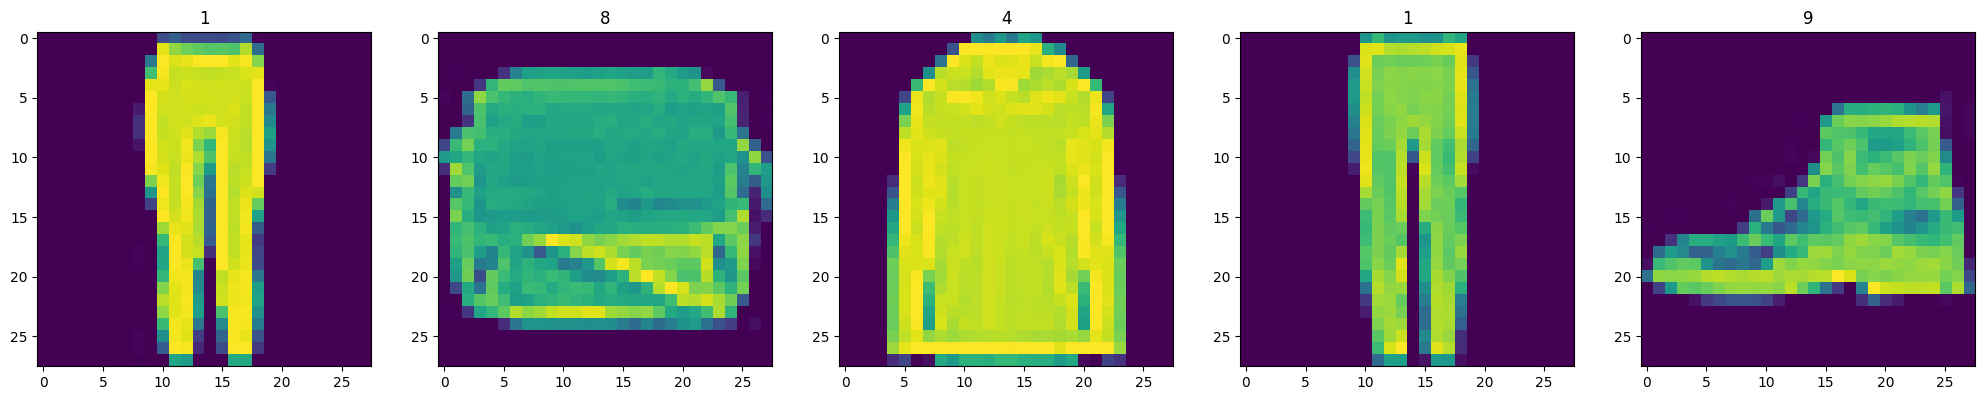

In [ ]:
#setting up the subplot formatting
fig1, ax=plt.subplots(ncols=5, figsize=(25,25))
for dx in range(5):
    sample=data_iterator.next()
    ax[dx].imshow(np.squeeze(sample['image']))
    ax[dx].title.set_text(sample['label'])

SCALING/PREPROCESSING

In [ ]:
# scaling image and returning images only
def scale_images(data):
    image=data['image']
    return image/255

In [ ]:
# Reload the dataset
ds=tfds.load('fashion_mnist', split='train')
# running the dataset through the scale_images preprocessing pipeline
ds=ds.map(scale_images)
# Caching the dataset for that batch
ds=ds.cache()
# shuffle the data up
ds=ds.shuffle(60000)
# grouping the images into a batches of 128
ds=ds.batch(128)
# Reduces the occurance of bottlenecking
ds=ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

BUILDING THE MODEL

In [ ]:
# loading the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# loading in the layers for the neural network 
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [ ]:
def build_generator():
    model=Sequential()

    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(.2))
    model.add(Reshape((7,7,128)))

# Upsampling 2D block
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding= 'same'))
    model.add(LeakyReLU(.2))

# Upsampling 2D block
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding= 'same'))
    model.add(LeakyReLU(.2))
    
# Convo Block to add more learning parameters 
    model.add(Conv2D(128,4, padding= 'same'))
    model.add(LeakyReLU(.2))

    model.add(Conv2D(128,4, padding= 'same'))
    model.add(LeakyReLU(.2))

# conv2d layer to convert the model to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [ ]:
generator=build_generator()

In [ ]:
generator.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_64 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_15 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_30 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [ ]:
img=generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 176ms/step


array([[[[0.50436336],
         [0.5042505 ],
         [0.5012428 ],
         ...,
         [0.49734065],
         [0.49804622],
         [0.49826953]],

        [[0.4996264 ],
         [0.50547487],
         [0.49633184],
         ...,
         [0.49204674],
         [0.49370095],
         [0.49935272]],

        [[0.5011962 ],
         [0.5060408 ],
         [0.4973391 ],
         ...,
         [0.49463776],
         [0.49762946],
         [0.50100327]],

        ...,

        [[0.49858797],
         [0.4988657 ],
         [0.49553213],
         ...,
         [0.4989313 ],
         [0.5011927 ],
         [0.5029679 ]],

        [[0.50189817],
         [0.5004133 ],
         [0.49906808],
         ...,
         [0.504099  ],
         [0.5019021 ],
         [0.49987048]],

        [[0.49956962],
         [0.5011932 ],
         [0.49840266],
         ...,
         [0.5037897 ],
         [0.50258714],
         [0.5019429 ]]],


       [[[0.4995656 ],
         [0.50156194],
         [0.50

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
fig, ax=plt.subplots(ncols=5, figsize=(25,25))
for dx, img in enumerate(img):
    
    ax[dx].imshow(np.squeeze(img))
    ax[dx].title.set_text(dx)

TypeError: 'numpy.float32' object is not iterable

Error in callback <function flush_figures at 0x0000024DD656BF60> (for post_execute):


KeyboardInterrupt: 